This notebook is to train the MNIST augmented dataset on SGD and Random Forest models

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score,precision_recall_curve, roc_curve, roc_auc_score,RocCurveDisplay,auc
from sklearn.model_selection import LearningCurveDisplay, learning_curve, ShuffleSplit

import numpy as np
import os
import joblib

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(IMAGES_PATH, exist_ok=True)
os.makedirs(MODELS_PATH, exist_ok=True)

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, name):
    name = name + ".pkl"
    p = os.path.join(MODELS_PATH, name)
    joblib.dump(model, p)

def load_model(model_name):
    model_name = model_name + ".pkl"
    p = os.path.join(MODELS_PATH, model_name)
    m = None
    if os.path.exists(p):
        m = joblib.load(p)
    return m

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]

print("Train",X.shape, "Label",y.shape)

y = y.astype(np.uint8)

Train (70000, 784) Label (70000,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [7]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1), (-1, -1), (1, 1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [8]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

# Model SGD

In [ ]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import RandomizedSearchCV

# sgd_clf = SGDClassifier(random_state=42)

# grid = {
#     'loss': ['hinge'],
#     'alpha': [0.0001, 0.001],
#     'penalty': ['l2', 'l1'],
# }

# search_sgd_clf = RandomizedSearchCV(sgd_clf, param_distributions=grid, scoring='accuracy', n_iter=3, verbose=2)

# search_sgd_clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/vinh/hv/iai600/assignments/3/repo/dev/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...............alpha=0.0001, loss=hinge, penalty=l1; total time=11.3min


/home/vinh/hv/iai600/assignments/3/repo/dev/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...............alpha=0.0001, loss=hinge, penalty=l1; total time=10.5min


/home/vinh/hv/iai600/assignments/3/repo/dev/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...............alpha=0.0001, loss=hinge, penalty=l1; total time=10.3min


/home/vinh/hv/iai600/assignments/3/repo/dev/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...............alpha=0.0001, loss=hinge, penalty=l1; total time=10.1min


/home/vinh/hv/iai600/assignments/3/repo/dev/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END ...............alpha=0.0001, loss=hinge, penalty=l1; total time=10.6min
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  50.8s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  48.1s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  48.5s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  49.8s
[CV] END ...............alpha=0.0001, loss=hinge, penalty=l2; total time=  44.8s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  50.0s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  50.8s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  42.4s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  51.5s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=  42.6s


,estimator,SGDClassifier(random_state=42)
,param_distributions,"{'alpha': [0.0001, 0.001], 'loss': ['hinge'], 'penalty': ['l2', 'l1']}"
,n_iter,3
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [ ]:
# save_model(search_sgd_clf, 'search_sgd_clf')

search_sgd_clf = load_model('search_sgd_clf')

In [34]:
search_sgd_clf.best_params_

{'penalty': 'l2', 'loss': 'hinge', 'alpha': 0.001}

In [33]:
y_pred = search_sgd_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8929285714285714

In [35]:
y_pred = search_sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8827857142857143

In [12]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'alpha':[0.01, 0.001]}
# ]

# sgd_grid_search = GridSearchCV(sgd_clf, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# sgd_grid_search.fit(X_train_augmented, y_train_augmented)

# Model Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV


# forest_reg = RandomForestClassifier(random_state=42)

# grid = {
#     'n_estimators': [300, 500, 1000],
#     'max_features': [20, 50, 100]
# }

# search_forest = RandomizedSearchCV(forest_reg, param_distributions=grid, scoring='accuracy', n_iter=3, verbose=2)

# search_forest.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..................max_features=20, n_estimators=300; total time=  44.8s
[CV] END ..................max_features=20, n_estimators=300; total time=  46.1s
[CV] END ..................max_features=20, n_estimators=300; total time=  46.4s
[CV] END ..................max_features=20, n_estimators=300; total time=  45.5s
[CV] END ..................max_features=20, n_estimators=300; total time=  46.1s
[CV] END .................max_features=20, n_estimators=1000; total time= 2.3min
[CV] END .................max_features=20, n_estimators=1000; total time= 2.5min
[CV] END .................max_features=20, n_estimators=1000; total time= 2.3min
[CV] END .................max_features=20, n_estimators=1000; total time= 2.4min
[CV] END .................max_features=20, n_estimators=1000; total time= 2.6min
[CV] END .................max_features=100, n_estimators=500; total time= 6.2min
[CV] END .................max_features=100, n_est

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_features': [20, 50, ...], 'n_estimators': [300, 500, ...]}"
,n_iter,3
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
# save_model(search_forest, 'search_forest_clf')

search_forest_clf = load_model('search_forest_clf')

In [28]:
search_forest_clf.best_params_

{'n_estimators': 1000, 'max_features': 20}

In [29]:
y_pred = search_forest_clf.predict(X_train)
accuracy_score(y_train, y_pred)

1.0

In [30]:
y_pred = search_forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.968

In [40]:
def draw_learning_curves(m1,m2, X, y):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)
    plt.subplots_adjust(hspace=0.5)

    common_params = {
        "X": X,
        "y": y,
        "train_sizes": [784, 1568, 5000, 10000, 20000],
        "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
        "score_type": "both",
        "score_name": "Accuracy",
        "line_kw": {"marker": "o"},
        "std_display_style": 'fill_between',
    }

    ax0 = ax[0]
    LearningCurveDisplay.from_estimator(m1, **common_params, ax=ax0)
    handles, label = ax0.get_legend_handles_labels()
    ax0.legend(handles[:2], ["Train Score", "Test Score"])
    ax0.set_title(f"SGD Classifier")
    ax0.set_xlabel("Set size")
    ax0.grid(True)

    ax1 = ax[1]
    LearningCurveDisplay.from_estimator(m2, **common_params, ax=ax1)
    handles, label = ax1.get_legend_handles_labels()
    ax1.legend(handles[:2], ["Train Score", "Test Score"])
    ax1.set_title(f"Random Forest Classifier")
    ax1.set_xlabel("Set size")
    ax1.grid(True)

Saving figure LC_sgd_rf


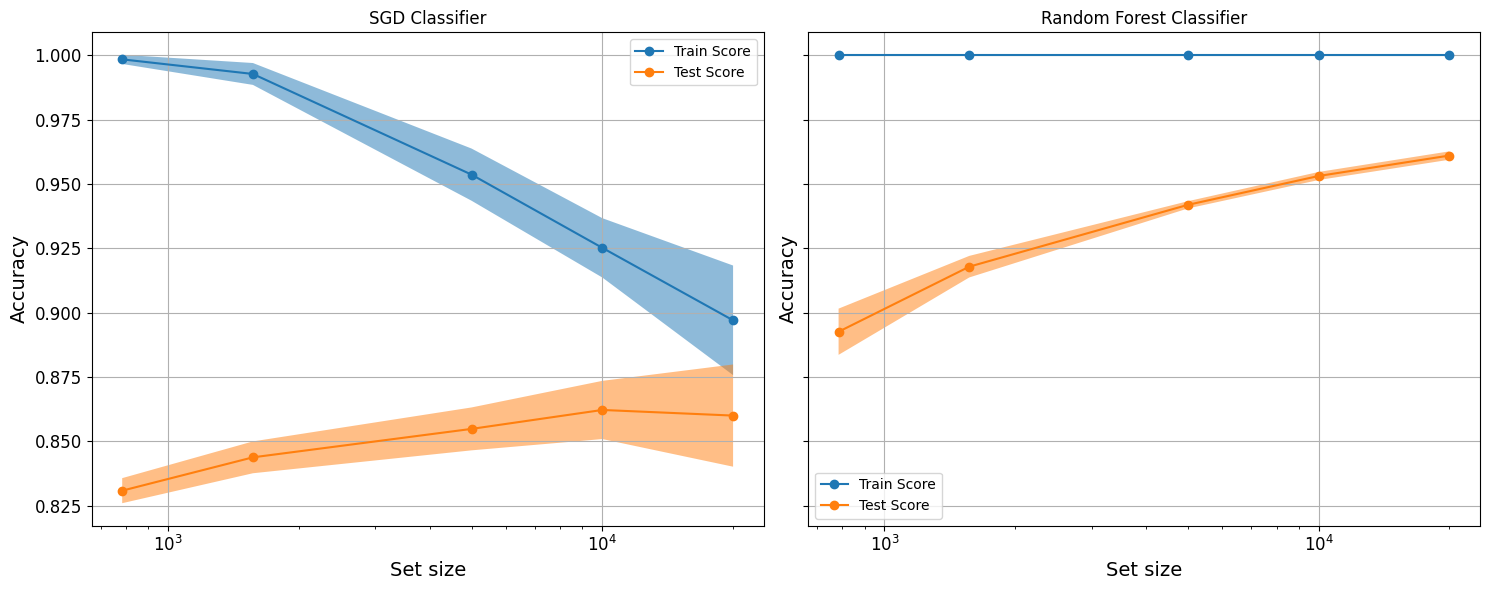

In [41]:
draw_learning_curves(search_sgd_clf.best_estimator_, search_forest_clf.best_estimator_, X_train, y_train)

save_fig('LC_sgd_rf')